In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi
import scoobi.utils as utils

import lina

print(scoobi.__file__)
print(lina.__file__)

import purepyindi
from purepyindi import INDIClient
import purepyindi2
from purepyindi2 import IndiClient

client0 = INDIClient('localhost', 7624)
client0.start()

client = IndiClient()
client.connect()
client.get_properties()

def restart_clients():
    client0 = INDIClient('localhost', 7624)
    client0.start()

    client = IndiClient()
    client.connect()
    client.get_properties()

/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


/home/kianmilani/Projects/scoob-interface/scoobi/scoobi.py
/home/kianmilani/Projects/lina/lina/__init__.py


In [2]:
scoobi.home_block(client0)

In [4]:
scoobi.move_block_out(client0)

In [2]:
reload(scoobi)
I = scoobi.SCOOBI(scicam_channel='camsci', dm_channel='dm00disp00')
bias = 800e-9 * np.ones((I.Nact,I.Nact))*I.dm_mask

In [3]:
reload(scoobi)
xc, yc = (4600, 3400)
# xc, yc = (4500, 3300)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)


In [78]:
reload(scoobi)
xc, yc = (4600, 3400)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)

In [79]:
I.set_zwo_exp_time(0.0005, client0)

Set the ZWO exposure time to 5.00e-04s


In [80]:
I.set_zwo_gain(120, client0)

Set the ZWO gain setting to 120.0


In [29]:
I.set_fib_atten(10, client)

Set the fiber attenuation to 10.0


In [68]:
scoobi.move_psf(2, 0, client0)

In [77]:
scoobi.move_psf(0, 2, client0)

In [21]:
I.zero_dm()

In [8]:
I.set_dm(bias)

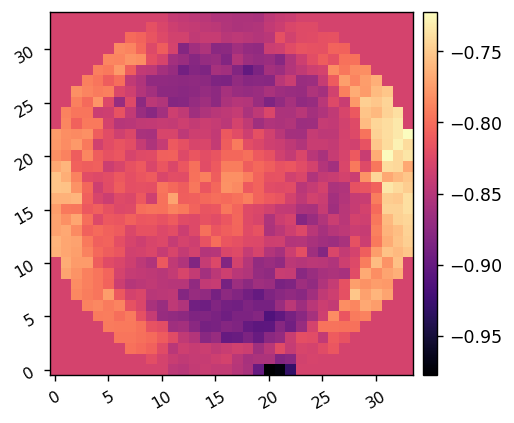

In [130]:
total_dm = I.DMT.grab_latest() 
imshow1(total_dm)

In [131]:
utils.save_fits('dm_flat_20250113.fits', total_dm)

Saved data to:  dm_flat_20250113.fits


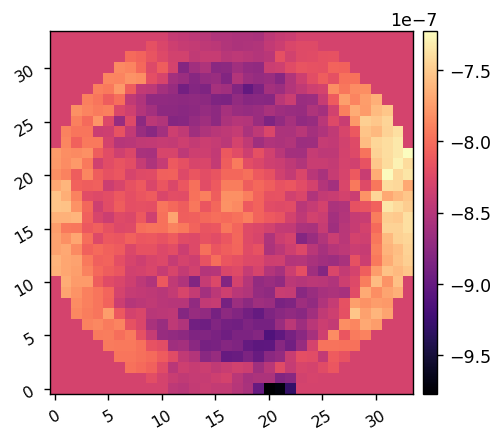

In [21]:
# old_flat = fits.getdata('dm_bias_defocus.fits') * 1e-6
old_flat = fits.getdata('dm_flat_20250113.fits') * 1e-6
imshow1(old_flat)

In [22]:
I.set_dm(old_flat)

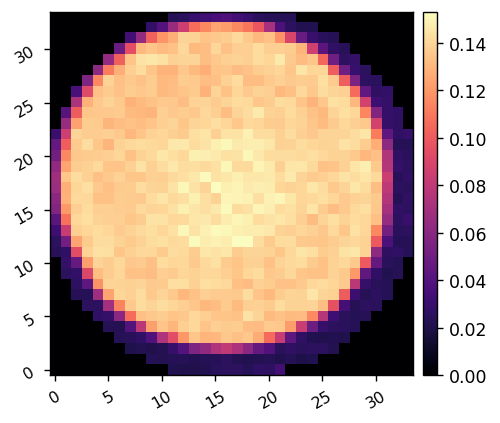

In [125]:
dmmap = fits.getdata('/opt/MagAOX/calib/fdpr2/kilo_dmdiv/dmmap.fits')
imshow1(dmmap)

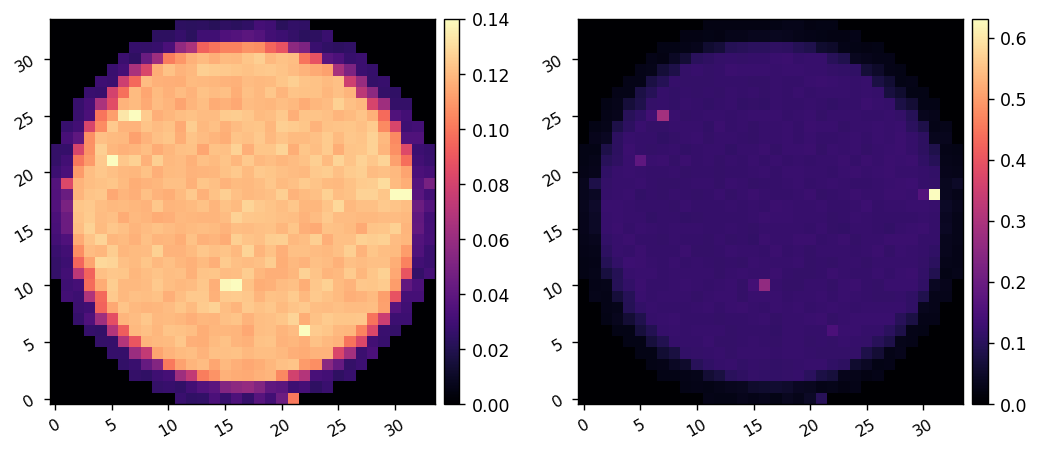

In [128]:
dmmap = fits.getdata('/opt/MagAOX/calib/fdpr2/kilo_dmdiv/dmmap.fits')
imshow2(dmmap, dmmap, vmax1=0.14)

In [149]:
dmmap[18,31]

np.float64(0.6298172716928281)